<a href="https://colab.research.google.com/github/achmadrachmandika/Machine_Learning/blob/main/Kuis_2_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##Nama: Achmad Rachmandika Rizky Pratama
##Kelas: 3A
##NIM: 2041720125
##KUIS 2 Machine Learning

In [1]:
#instal paket tesseract OCR menggunakan apt
!sudo apt install tesseract-ocr
#menginstal pyton memungkinkan menggunakan tessearct OCR langsung dari pyton
!pip install pytesseract
#menginstal bahasa indonesia untuk tesseract OCR
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 15 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,868 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [2]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

In [12]:
# # get grayscale image
# def get_grayscale(image):
#     return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# # noise removal
# def remove_noise(image):
#     return cv2.medianBlur(image,5)

# #thresholding
# def thresholding(image):
#     return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# #dilation
# def dilate(image):
#     kernel = np.ones((5,5),np.uint8)
#     return cv2.dilate(image, kernel, iterations = 1)

# #erosion
# def erode(image):
#     kernel = np.ones((5,5),np.uint8)
#     return cv2.erode(image, kernel, iterations = 1)

# #opening - erosion followed by dilation
# def opening(image):
#     kernel = np.ones((5,5),np.uint8)
#     return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

# #canny edge detection
# def canny(image):
#     return cv2.Canny(image, 100, 200)

# #skew correction
# def deskew(image):
#     coords = np.column_stack(np.where(image > 0))
#     angle = cv2.minAreaRect(coords)[-1]
#     if angle < -45:
#         angle = -(90 + angle)
#     else:
#         angle = -angle
#     (h, w) = image.shape[:2]
#     center = (w // 2, h // 2)
#     M = cv2.getRotationMatrix2D(center, angle, 1.0)
#     rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
#     return rotated

# #template matching
# def match_template(image, template):
#     return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

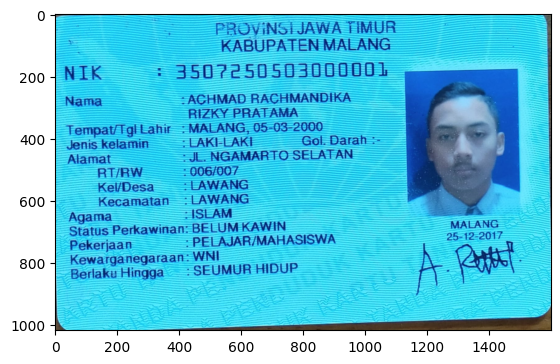

In [20]:
# Plot original image
image = cv2.imread('/content/drive/MyDrive/Kuliah Semester 5/Machine Learning/Kuis2/dataset-Ktp/KTP_Achmad Rachmandika.jpeg')
image_1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_1)

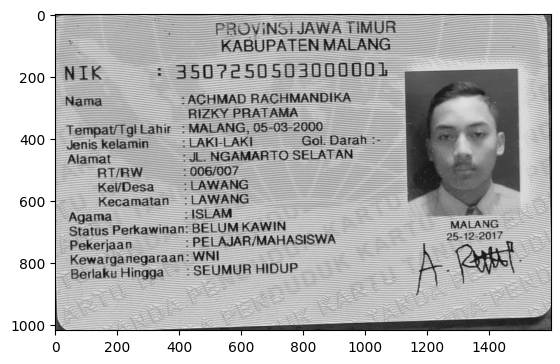

In [25]:
# Preprocess image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

In [26]:
#melakukan thresholding citra skala abu-abu
th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)

In [27]:
result = pytesseract.image_to_string((threshed), lang='ind')
result

'PROVINSI JAWA TIMUR\n\n \n\n: KABUPATEN MALANG\nNIK : 3507250503000001\nNama - ACHMAD RACHMANDIKA\nRIZKY PRATAMA\n\nTempat/Tgi Lahir : MALANG, 05-03-2000\nJenis kelamin 1 LAKI-LAKI Gol. Darah :-\nAlamat - JL. NGAMARTO SELATAN\n\nRT/RW :006/007\n\nKel/Desa : LAWANG\n\nKecamatan : LAWANG\nAgama : ISLAM II\nStatus Perkawinan: BELUM KAWIN MALANG\nPekerjaan : PELAJAR/MAHASISWA 25-12-2017\n\nKewarganegaraan: WNI\nBerlaku Hingga — : SEUMUR HIDUP\n\x0c'

In [28]:
#iterasi melalui setiap kata dalam teks hasil ekstraksi berdasarkan baris baru
for word in result.split('\n'):
    if "``_" in word:
        word = word.replace("''_", ":")

    #apakah kata tersebut mengandung "NIK"
    if "NIK" in word:
        nik_chars = word.split()
        for i in range(len(nik_chars)):
            if "D" in nik_chars[i]:
                nik_chars[i] = nik_chars[i].replace("D", "0")
            if "?" in nik_chars[i]:
                nik_chars[i] = nik_chars[i].replace("?", "7")

        word = ' '.join(nik_chars)

    print(word)

PROVINSI JAWA TIMUR

 

: KABUPATEN MALANG
NIK : 3507250503000001
Nama - ACHMAD RACHMANDIKA
RIZKY PRATAMA

Tempat/Tgi Lahir : MALANG, 05-03-2000
Jenis kelamin 1 LAKI-LAKI Gol. Darah :-
Alamat - JL. NGAMARTO SELATAN

RT/RW :006/007

Kel/Desa : LAWANG

Kecamatan : LAWANG
Agama : ISLAM II
Status Perkawinan: BELUM KAWIN MALANG
Pekerjaan : PELAJAR/MAHASISWA 25-12-2017

Kewarganegaraan: WNI
Berlaku Hingga — : SEUMUR HIDUP

